In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

## Day 28 Lecture 1 Assignment

In this assignment, we will learn about making predictions with linear models. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [25]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ssl

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error

ssl._create_default_https_context = ssl._create_unverified_context

<IPython.core.display.Javascript object>

In [5]:
king_county = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv"
)

<IPython.core.display.Javascript object>

In [6]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<IPython.core.display.Javascript object>

In [7]:
king_county.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<IPython.core.display.Javascript object>

We'll start by adding a column of the log of total sqare feet. This transformation will help us with model assumptions.

In [8]:
king_county["log_sqft_living"] = np.log(king_county["sqft_living"])

<IPython.core.display.Javascript object>

Filter out columns and keeping only: price, bedrooms, bathrooms, log_sqft_living, floors, waterfront

In [9]:
king_county = king_county[
    ["price", "bedrooms", "bathrooms", "log_sqft_living", "floors", "waterfront"]
]
king_county

,price,bedrooms,bathrooms,log_sqft_living,floors,waterfront
0,221900.0,3,1.00,7.073270,1.0,0
1,538000.0,3,2.25,7.851661,2.0,0
2,180000.0,2,1.00,6.646391,1.0,0
3,604000.0,4,3.00,7.580700,1.0,0
4,510000.0,3,2.00,7.426549,1.0,0
...,...,...,...,...,...,...
21608,360000.0,3,2.50,7.333023,3.0,0
21609,400000.0,4,2.50,7.745003,2.0,0
21610,402101.0,2,0.75,6.927558,2.0,0
21611,400000.0,3,2.50,7.377759,2.0,0


<IPython.core.display.Javascript object>

Next, we'll check for missing values and remove rows containing missing values. We will also make sure that all our data is numeric and convert the columns that are of object type to numeric. Make sure to remove any rows with missing data resulting from the conversion to numeric.

In [10]:
king_county.isna().mean()

price              0.0
bedrooms           0.0
bathrooms          0.0
log_sqft_living    0.0
floors             0.0
waterfront         0.0
dtype: float64

<IPython.core.display.Javascript object>

In [11]:
king_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21613 non-null  float64
 1   bedrooms         21613 non-null  int64  
 2   bathrooms        21613 non-null  float64
 3   log_sqft_living  21613 non-null  float64
 4   floors           21613 non-null  float64
 5   waterfront       21613 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 1013.2 KB


<IPython.core.display.Javascript object>

Split the data into test and train subsets. Use 20% of the data for the test subset. Use price as the dependent variable.

In [42]:
X = king_county.drop(columns=["price"])
y = king_county["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40
)

<IPython.core.display.Javascript object>

Check the model assumptions: homoscedacity, normal errors, and multicollinearity

In [43]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

lm_results = sm.OLS(y_train, X_train_const).fit()


lm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 1.218e+04
Date:                Wed, 08 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:52:19   Log-Likelihood:            -2.3192e+05
No. Observations:               17290   AIC:                         4.639e+05
Df Residuals:                   17283   BIC:                         4.639e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7.128e+06   3.88e+04   -183.721      0.000    -7.2e+06   -7.05e+06
bedrooms        -4183.8900   1708.475     -2.449      0.014   -7532.674    -835.106
bathrooms         4.58e+04   2668.046     17.164      0.000    4.06e+04     5.1e+04
log_sqft_living -1.743e+04   5579.881     -3.124      0.002   -2.84e+04   -6496.603
floors           -3.36e+04   2648.734    -12.683      0.000   -3.88e+04   -2.84e+04
waterfront       5.077e+05   1.45e+04     34.931      0.000    4.79e+05    5.36e+05
log_price        5.951e+05   3244.124    183.425      0.000    5.89e+05    6.01e+05
==============================================================================
Omnibus:                    25705.288   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24225043.666
Skew:                           8.803   Prob(JB):                         0.00
Kurtosis:                     185.528   Cond. No.                         498.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

In [45]:
y_pred = lm_results.predict(X_test_const)

<IPython.core.display.Javascript object>

In [16]:
_, lmp, _, fp = het_breuschpagan(lm_results.resid, X_train_const)
print(lmp)
print(fp)

3.8958461359598915e-220
5.633907895454699e-227


<IPython.core.display.Javascript object>

Not homoscedastic

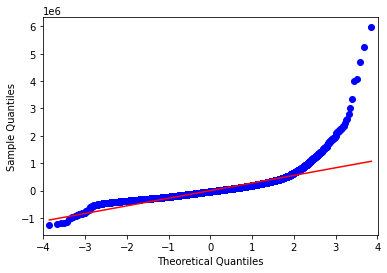

<IPython.core.display.Javascript object>

In [18]:
qqplot(lm_results.resid, line="s")
plt.show()

Errors are not normal.

In [17]:
vifs = []
for i in range(X_train_const.shape[1]):
    vif = variance_inflation_factor(X_train_const.values, i)
    vifs.append(vif)

pd.Series(vifs, index=X_train_const.columns)

const              661.027137
bedrooms             1.657947
bathrooms            2.760413
log_sqft_living      2.871115
floors               1.347511
waterfront           1.011472
dtype: float64

<IPython.core.display.Javascript object>

There are two model assumptions that fail. One way to fix them is to apply a log transformation to price. Create a new train test split where y is the natural log of price and retest the model assumptions.

In [19]:
king_county["log_price"] = np.log(king_county["price"])

<IPython.core.display.Javascript object>

In [20]:
king_county.head()

,price,bedrooms,bathrooms,log_sqft_living,floors,waterfront,log_price
0,221900.0,3,1.00,7.073270,1.0,0,12.309982
1,538000.0,3,2.25,7.851661,2.0,0,13.195614
2,180000.0,2,1.00,6.646391,1.0,0,12.100712
3,604000.0,4,3.00,7.580700,1.0,0,13.311329
4,510000.0,3,2.00,7.426549,1.0,0,13.142166


<IPython.core.display.Javascript object>

Create a linear model and produce a model summary

In [21]:
X = king_county.drop(columns=["price", "log_price"])
y = king_county["log_price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40
)

<IPython.core.display.Javascript object>

In [35]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

lm_results = sm.OLS(y_train, X_train_const).fit()

lm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     3221.
Date:                Wed, 08 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:47:22   Log-Likelihood:                -7784.8
No. Observations:               17290   AIC:                         1.558e+04
Df Residuals:                   17284   BIC:                         1.563e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.9134      0.074     93.133      0.000       6.768       7.059
bedrooms           -0.0672      0.004    -16.902      0.000      -0.075      -0.059
bathrooms           0.0539      0.006      8.637      0.000       0.042       0.066
log_sqft_living     0.8170      0.012     70.963      0.000       0.794       0.840
floors              0.0480      0.006      7.739      0.000       0.036       0.060
waterfront          0.7354      0.034     21.879      0.000       0.670       0.801
==============================================================================
Omnibus:                       87.099   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.991
Skew:                           0.158   Prob(JB):                     2.12e-19
Kurtosis:                       2.862   Cond. No.                         228.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

Predict the y values for the test sample using our model above.

Plot the true vs. predicted values and compute the MAE, MSE, RMSE and MAPE

In [36]:
y_pred = lm_results.predict(X_test_const)
y_pred

21568    13.670076
3040     13.345526
198      13.114888
16456    12.959087
19502    13.200893
           ...    
12385    13.330155
18099    12.429313
9347     13.044047
18718    13.432853
8642     12.646182
Length: 4323, dtype: float64

<IPython.core.display.Javascript object>

In [37]:
evaluators = ["mae", "mse", "rmse", "mape"]
evaluations = [
    mean_absolute_error(y_test, y_pred),
    mse(y_test, y_pred),
    rmse(y_test, y_pred),
    np.mean(np.abs((y_test - y_pred) / y_test)) * 100,
]
evaluation_df = pd.DataFrame({"evaluators": evaluators, "values": evaluations})
evaluation_df

,evaluators,values
0,mae,0.303754
1,mse,0.139802
2,rmse,0.373901
3,mape,2.332867


<IPython.core.display.Javascript object>

In [39]:
evaluation_df["unlogged"] = 10 ** evaluation_df["values"]

<IPython.core.display.Javascript object>

In [40]:
evaluation_df

,evaluators,values,unlogged
0,mae,0.303754,2.012585
1,mse,0.139802,1.379756
2,rmse,0.373901,2.365382
3,mape,2.332867,215.212218


<IPython.core.display.Javascript object>